**IPL 2022 Capstone Project**

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [8]:
df.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')

**Basic Information**


In [79]:
matches = df['match_id'].count()
matches

np.int64(74)

Check the size of rows and columns of the dataset.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [18]:
print(f'The Rows in Ipl 2022 dataset is {df.shape[0]} and the Columns is {df.shape[1]}.')

The Rows in Ipl 2022 dataset is 74 and the Columns is 20.


How many columns have null values?

In [24]:
df.isnull().sum()    #true + false = true(1) and false+false = false(0)

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

which teams won most matches??

In [25]:
match_wins = df['match_winner'].value_counts()
match_wins

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

Text(0, 0.5, 'Winning Team')

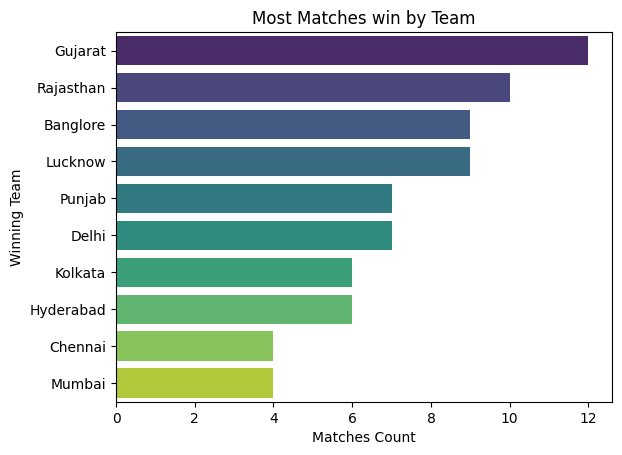

In [33]:
sns.barplot(y = match_wins.index, x = match_wins.values,palette='viridis')
plt.title('Most Matches win by Team')
plt.xlabel('Matches Count')
plt.ylabel('Winning Team')

Text(0.5, 1.0, 'Match Winnings')

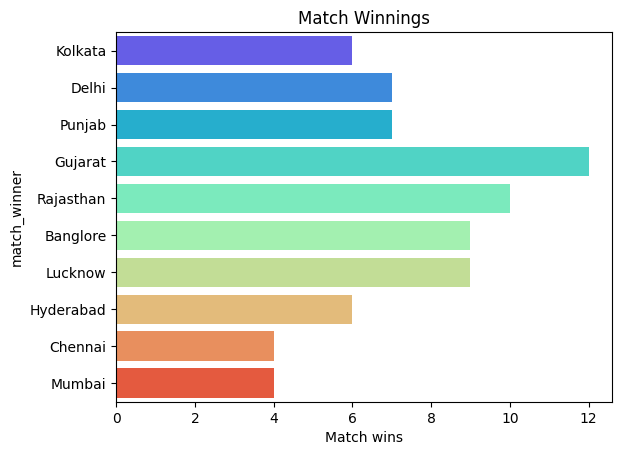

In [68]:
sns.countplot(y = df['match_winner'], palette='rainbow')
plt.xlabel('Match wins')
plt.title('Match Winnings')

**2.Toss Decision Trends**

In [34]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [36]:
toss = df['toss_decision'].value_counts()
toss

toss_decision
Field    59
Bat      15
Name: count, dtype: int64

<Axes: xlabel='toss_decision'>

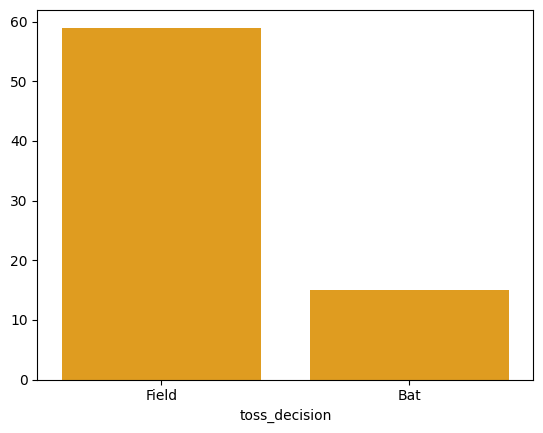

In [55]:
sns.barplot(x=toss.index, y = toss.values , color='orange')

Text(0.5, 0, 'Toss Decision')

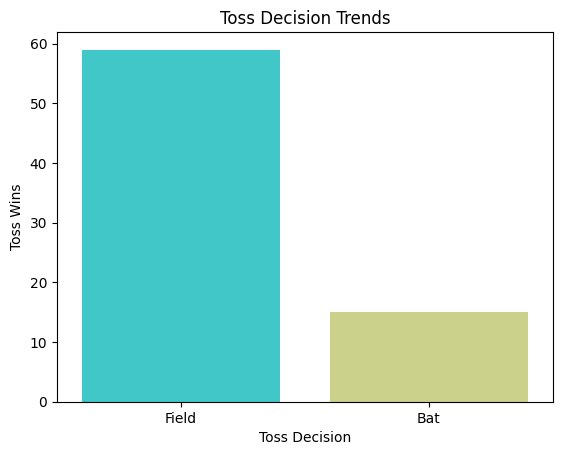

In [71]:
sns.countplot(x = df['toss_decision'], palette='rainbow')
plt.title('Toss Decision Trends')
plt.ylabel('Toss Wins')
plt.xlabel('Toss Decision')

Toss Winner vs Match winners

In [87]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
count


np.int64(36)

In [94]:
percentage = (count * 100) /  df['match_id'].count()  #or  df.shape[0]
percentage
percentage.round(2)


np.float64(48.65)

How do teams wins ( running or wickets)

Text(0.5, 1.0, 'Won by')

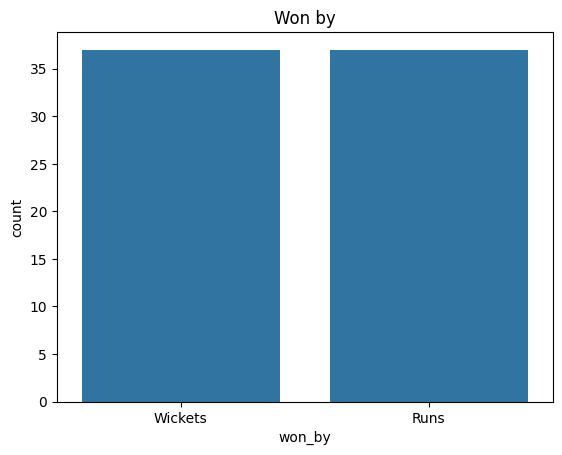

In [98]:
sns.countplot(x= 'won_by', data=df)
# sns.countplot(x= df['won_by])
plt.title('Won by')

**Key Player Performances**

1. Most 'Player of the Match' Awards.

In [110]:
plm = df['player_of_the_match'].value_counts().head(10)
plm

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Shubman Gill         2
Avesh Khan           2
Dinesh Karthik       2
Hardik Pandya        2
Rahul Tripathi       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Most Player of The Match')

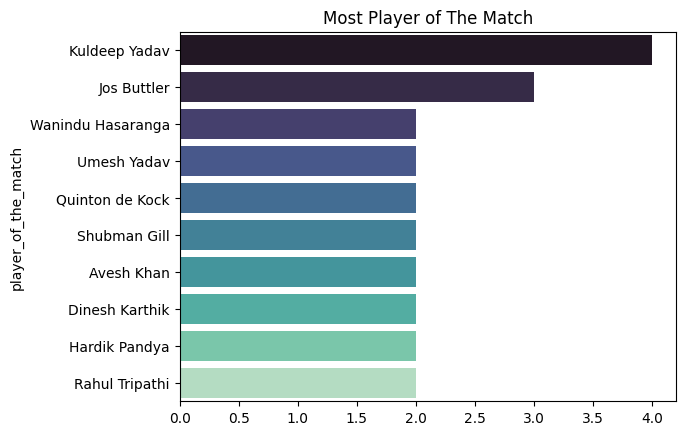

In [117]:
sns.barplot(y = plm.index, x = plm.values, palette='mako')
plt.title('Most Player of The Match')

**2 Top Scorer**

In [131]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

Text(0, 0.5, 'Player Name')

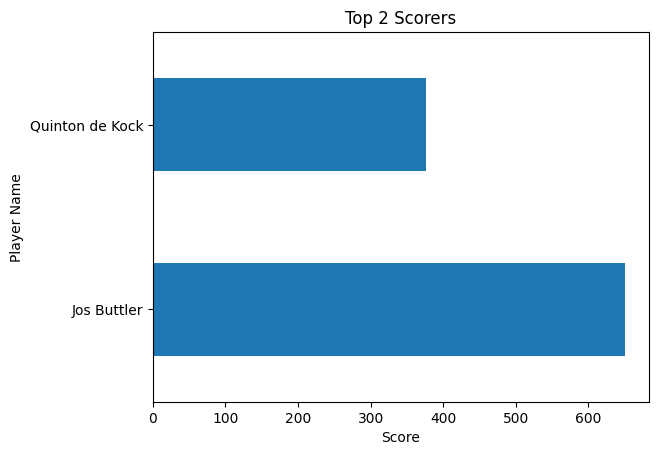

In [136]:
high.plot(kind='barh')
plt.title('Top 2 Scorers')
plt.xlabel('Score')
plt.ylabel('Player Name')

Text(0, 0.5, 'Player Name')

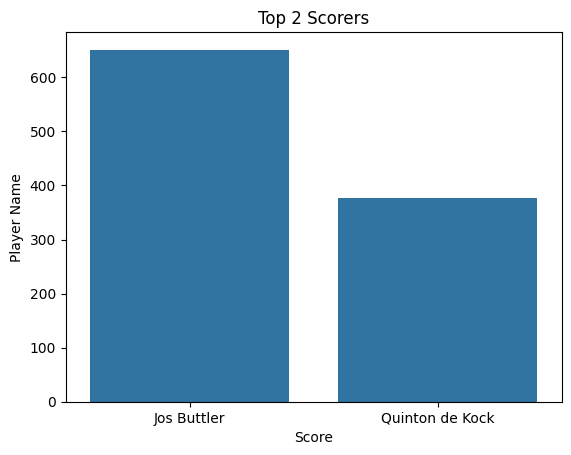

In [138]:
sns.barplot(x = high.index, y = high.values)
plt.title('Top 2 Scorers')
plt.xlabel('Score')
plt.ylabel('Player Name')

In [119]:
scorer = df['top_scorer'].value_counts().head(2)
scorer

top_scorer
Jos Buttler        7
Quinton de Kock    5
Name: count, dtype: int64

Text(0.5, 1.0, '2 Top Scorers')

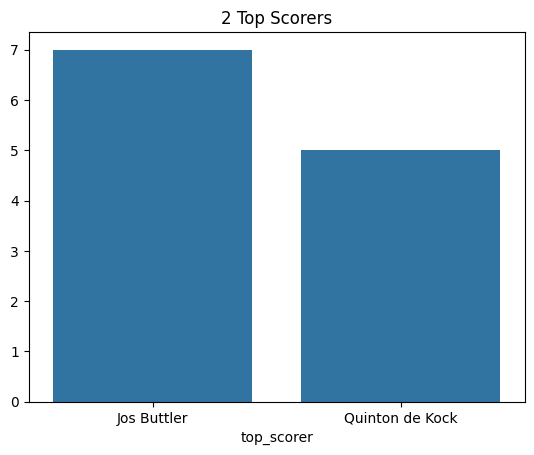

In [121]:
sns.barplot(x = scorer.index, y = scorer.values)
plt.title('2 Top Scorers')

10 Best Bowling figures

Text(0.5, 0, 'Wickets')

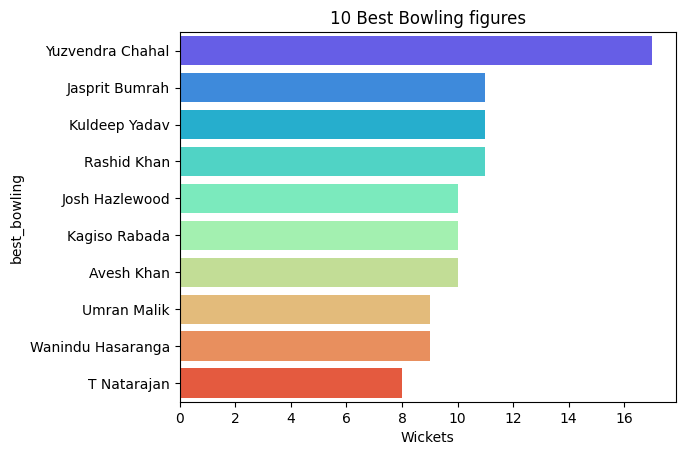

In [158]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x: x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)
top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers
sns.barplot(y = top_bowlers.index, x = top_bowlers.values, palette='rainbow')
plt.title('10 Best Bowling figures')
plt.xlabel('Wickets')

**Most Matches Played by Venue**

Text(0.5, 1.0, 'Most Matches Played by Venue')

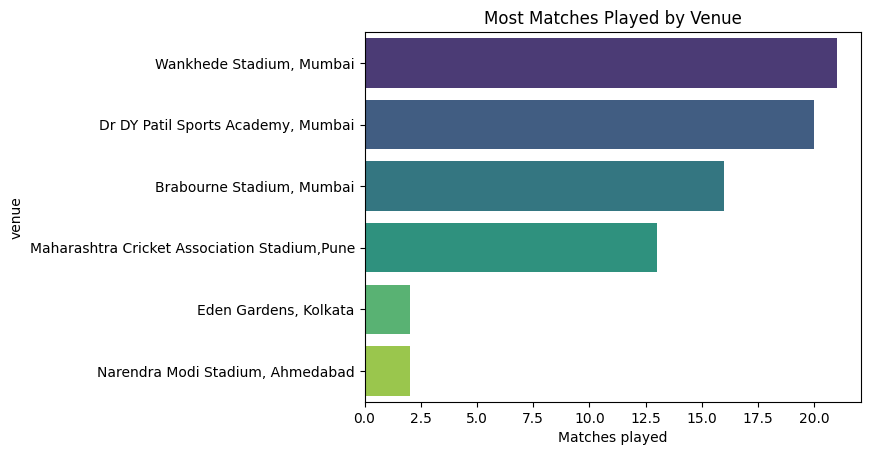

In [164]:
venue = df['venue'].value_counts()
venue
sns.barplot(x = venue.values, y = venue.index, palette='viridis')
plt.xlabel('Matches played')
plt.title('Most Matches Played by Venue')

**Who wons the highest margin by runs?**

In [169]:
df[df['won_by'] == 'Runs'].sort_values(by='margin', ascending=False)[['match_winner','margin']].head(1)

,match_winner,margin
54,Chennai,91


**Who wons the highest margin by wickets?**

In [175]:
df[df['won_by'] == 'Wickets'].sort_values(by='margin',ascending=False)[['match_winner', 'margin']].head(2)

,match_winner,margin
31,Delhi,9
35,Hyderabad,9


In [178]:
df[df['highscore'] == df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


In [181]:
df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
